# Introduction

The galactic centre holds many mysteries, one of which is the flares. These flares occur on a daily basis, and last for a few hours at a time. Their luminosity is around $10^{34.5}$ erg/s, which translates to a total energy of around $10^{38}$ erg. One idea proposed to explain these flares is the [ablation of asteroids](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1110.6872). It has been shown that this mechanism can deposit enough energy within the relevant time frame. In this notebook we explore how fast can this energy be radiated.

# Review of Wet Disruption

Let us consider an asteroid with size $r_a$ and mass density $\rho_a$. Suppose that it is moving radially toward a supermassive black hole with mass $M_h$. Suppose further that the number density of the diffuse matter varies with distance to the black hole as $n_d = k r^{-\omega}$, where $\omega = 3/2$, and the coefficient $k$ can be calibrated from the [Chandra measurements](http://iopscience.iop.org/article/10.1086/375145/fulltext/53430.text.html). As a result of the collision between the asteroid and the ambient medium, the asteroid heats up. We consider a monolithic, solid asteroid, and so to vaporise it, the energy per unit mass necessary is approximately given by the speed of elastic waves squared $c_e^2$. We proceed to calculate the radius at which enough energy is released due to the interaction between the asteroid and the ambient medium to vaporise the asteroid

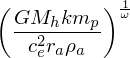

In [13]:
import sympy
sympy.init_printing()
k = sympy.Symbol('k') # Ambient density profile prefactor
omega = sympy.Symbol('omega') # Ambient density profile exponent
r = sympy.Symbol('r') # Distance from the black hole
n = sympy.Symbol('n') # Density of diffuse gas
c_e = sympy.Symbol('c_e') # Elastic wave speed
r_a = sympy.Symbol('r_a') # Asteroid size
rho_a = sympy.Symbol('rho_a') # Asteroid density
G = sympy.Symbol('G') # Graviation constant
M_h = sympy.Symbol('M_h') # Black hole mass
m_p = sympy.Symbol('m_p') # Proton mass
v_k = sympy.Symbol('v_k') # Keplerian velocity
temp = sympy.Eq(c_e**2*r_a**3*rho_a, m_p*n*v_k**3*r_a**2*r/v_k)
temp = temp.subs(n, k*r**(-omega))
temp = temp.subs(v_k, sympy.sqrt(G*M_h/r))
destruction_radius = sympy.solve(temp, r)[0]
destruction_radius

Substituting typical numbers

In [79]:
import scipy.constants
from sympy.physics.units import meter, kg, second, km, cm, kelvin, joule, gram
M_sun = 2e30*kg
pc = 3e18*cm
au = 1.5e13*cm
r_ch = sympy.Symbol('r_ch') # Radius of chandra measurements
n_ch = sympy.Symbol('n_ch') # Number density in the chandra measurement
temp = destruction_radius
temp = temp.subs(sympy.solve(sympy.Eq(n_ch, k*r_ch**(-omega)),k,dict=True)[0])
temp = temp.subs({G:scipy.constants.G*meter**3/kg/second**2,
                  omega:sympy.Rational(3,2),
                  c_e: 1e3*km/second,
                  M_h: 4e6*M_sun,
                  m_p:scipy.constants.m_p*kg,
                  n_ch: 130/cm**3,
                  r_ch: 0.04*pc,
                  r_a: 1.0*km,
                  rho_a: kg/meter**3
                 })
temp = temp.subs(km, 1000*meter)
temp = temp.subs(meter, 100*cm)
temp/au

This is somewhat smaller than the value used in Zubovas et al 2011 (1 au). In the remainder of the notebook I'll still use the canonical value of 1 au, though.

Also, I underestimate the speed of elastic waves. According to [Kraus et al 2012](http://onlinelibrary.wiley.com/doi/10.1029/2012JE004082/full), the speed should be closer to 5 km/s.

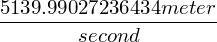

In [64]:
temp = (5130*kelvin)*(5150*joule/kg/kelvin)
temp = temp.subs(joule, kg*meter**2/second**2)
sympy.sqrt(temp).n()

Available kinetic energy at the destruction radius

In [85]:
erg = gram*cm**2/second**2
temp = G*M_h*rho_a*r_a**3/destruction_radius
temp = temp.subs(sympy.solve(sympy.Eq(n_ch, k*r_ch**(-omega)),k,dict=True)[0])
temp = temp.subs({G:scipy.constants.G*meter**3/kg/second**2,
                  omega:sympy.Rational(3,2),
                  c_e: 1e3*km/second,
                  M_h: 4e6*M_sun,
                  m_p:scipy.constants.m_p*kg,
                  n_ch: 130/cm**3,
                  r_ch: 0.04*pc,
                  r_a: 10.0*km,
                  rho_a: kg/meter**3
                 })
temp = temp.subs(km, 1000*meter)
temp = temp.subs(meter, 100*cm)
temp = temp.subs(kg, 1000*gram)
temp/erg

This energy is also much smaller than the typical energy in a flare ($10^{38}$ erg)

# Radiation Efficiency

Let's ignore the problems in the previous section and suppose that enough energy ($10^{38}$ erg) is injected into a medium with a density $10^8 \, \rm cm^{-3}$. This is achieved by converting the kinetic energy of the asteroid to thermal energy, and so the thermal velocity of the particles is equal to the keplerian velocity $0.1 c$.

In this sections we explore four emission channels: Bremsstrahlung, inverse Compton, pair produciton and synchrotron emission.

## Bremsstrahlung

The cooling time of plasma heated up to thermal velocities of $0.1 c$ is

In [113]:
year = 1e7*second
k_b = sympy.Symbol('k_b') # Boltzmann constant
T = sympy.Symbol('T') # Temperature
alpha = sympy.Symbol('alpha') # Fine structure constant
m_e = sympy.Symbol('m_e') # Electron mass
c = sympy.Symbol('c') # Speed of light
r_e = sympy.Symbol('r_e') # Classical electron radius
temp = n*k_b*T/(alpha*m_e*c**3*(n*r_e**3)**2*sympy.sqrt(k_b*T/m_e/c**2)/r_e**4)
temp = temp.subs(T, m_p*(0.1*c)**2/k_b)
temp = temp.subs({alpha:scipy.constants.alpha,
                 n:1e8/cm**3,
                 m_p:scipy.constants.m_p*kg,
                 m_e:scipy.constants.m_e*kg,
                 c:scipy.constants.c*meter/second,
                 r_e:scipy.constants.physical_constants['classical electron radius'][0]*meter})
temp = temp.subs(meter, 100*cm)
temp/year

## Inverse Compton

The [bolometric luminosity](https://arxiv.org/ftp/arxiv/papers/1003/1003.1519.pdf) from SGR A\* is $10^{35}$ erg/s. These photons can interact with the hot plasma and carry away energy. We calculate the cooling time from inverse compton

In [128]:
L_h = sympy.Symbol('L_h')
temp = n*k_b*T/(r_e**2*L_h/r**2)/n/(k_b*T/m_e/c**2)**2
temp = temp.subs(T, m_p*(0.1*c)**2/k_b)
temp = temp.subs({alpha:scipy.constants.alpha,
                 n:1e8/cm**3,
                 r: au,
                 L_h: 1e35*erg/second,
                 m_p:scipy.constants.m_p*kg,
                 m_e:scipy.constants.m_e*kg,
                 c:scipy.constants.c*meter/second,
                 r_e:scipy.constants.physical_constants['classical electron radius'][0]*meter})
temp = temp.subs(kg, 1000*gram)
temp/year

## Pair production

Pair production can increase the number of charges in the plasma, and thus shorten the cooling time. However, with the energy available, pair production can only increase the density by a factor of

In [130]:
L_h = sympy.Symbol('L_h')
temp = (k_b*T/m_e/c**2)
temp = temp.subs(T, m_p*(0.1*c)**2/k_b)
temp = temp.subs({alpha:scipy.constants.alpha,
                 n:1e8/cm**3,
                 r: au,
                 L_h: 1e35*erg/second,
                 m_p:scipy.constants.m_p*kg,
                 m_e:scipy.constants.m_e*kg,
                 c:scipy.constants.c*meter/second,
                 r_e:scipy.constants.physical_constants['classical electron radius'][0]*meter})
temp = temp.subs(kg, 1000*gram)
temp

Even if the Bremsstrahlung cooling time would be shorter by this factor, it would still be about 10 years, and hence much larger than the few hours time scale.

Pair production affect inverse Compton in a complex way. On the one hand, it increases the number of scatterers, which shortens the cooling time. On the other hand, it reduces the Lorentz factor, and hence increases the cooling time. The second effect is stronger, and hence the net effect is to increase the cooling time.

Pair production becomes important once the positron density becomes comparable to the baryon density. However, for this to happen, the hot gas has to first radiate 5% ($m_e c^2/ k T$) of its energy. From the discussion in the previous sections, this cannot happen on the flare time scale. 

## Synchrotron radiation

The [magnetic field within a few au from SGR A\*](https://arxiv.org/pdf/1512.01220.pdf) is estimated to be around a few tens of gauss. The cooling time from synchrotron emission would be

In [140]:
hour = 3600*second
B = sympy.Symbol('B') # Magnetic field
gauss = sympy.sqrt(erg/cm**3)
temp = k_b*T/(r_e**2*c*B**2)/(k_b*T/m_e/c**2)**2
temp = temp.subs(T, m_p*(0.1*c)**2/k_b)
temp = temp.subs({alpha:scipy.constants.alpha,
                 n:1e8/cm**3,
                 r: au,
                 B:30*gauss,
                 m_p:scipy.constants.m_p*kg,
                 m_e:scipy.constants.m_e*kg,
                 c:scipy.constants.c*meter/second,
                 r_e:scipy.constants.physical_constants['classical electron radius'][0]*meter})
temp = temp.subs(kg, 1000*gram)
temp = temp.subs(meter, 100*cm)
temp/hour

This magnetic field is close to the equipartition value of plasma

In [149]:
temp = sympy.sqrt(n*k_b*T)
temp = temp.subs(T, m_p*(0.1*c)**2/k_b)
temp = temp.subs({alpha:scipy.constants.alpha,
                 n:1e8/cm**3,
                 r: au,
                 B:30*gauss,
                 m_p:scipy.constants.m_p*kg,
                 m_e:scipy.constants.m_e*kg,
                 c:scipy.constants.c*meter/second,
                 r_e:scipy.constants.physical_constants['classical electron radius'][0]*meter})
temp = temp.subs(kg, 1000*gram)
temp = temp.subs(meter, 100*cm)
(temp/gauss).n()

A synchrotron emission is consistent with [observations](http://adsabs.harvard.edu/abs/2009ApJ...698..676D). The effect of supra - thermal, Fermi accelerate particles has been considered in [this work](http://iopscience.iop.org/article/10.1088/0004-637X/726/1/54/pdf).